In [1]:
import pandas as pd             #進行資料處理函式庫
import numpy as np              #高階大量的維度陣列與矩陣計算
import matplotlib.pyplot as plt #繪圖
import seaborn as sns           #繪圖
import io                       #負責處理資料 input/output
import requests                 #HTTP Request下載訓練資料用

In [15]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
s = requests.get(url).content
df_train = pd.read_csv(io.StringIO(s.decode("utf-8")))
#df_train = df_train.drop(labels=["sepal.length"],axis=1)    #移除sepal.length  axis= 1為行 0為列
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [13]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
s = requests.get(url).content
io.StringIO(s.decode("utf-8"))

In [ ]:
#讀取csv檔
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
df = pd.read_csv(url)
df

In [ ]:
#讀取txt檔
df = pd.read_table("./iris.txt", sep=",")
df

In [ ]:
#手動編碼
#處理名目資料(Nominal variables)-資料前處理 依據特徵資料的特性，可以選擇編碼或自動編碼。
#使用編碼時機?
#進行深度學習時，神經網路只能處理數值資料。因此我們需要將所有非數字型態的特徵進行轉換。

In [25]:
lable_map = {"Setosa":0,"Versicolor":1,"Virginica":2}
#將編碼後的lable map存至df_train["variety"]中。
df_train["Class"] = df_train["variety"].map(lable_map)

lable_map
df_train

,sepal.length,sepal.width,petal.length,petal.width,variety,Class
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,2
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


### EDA(Exploratory Data Analysis)探索式資料分析
主要概念是透過數據統計的方式視覺化資料。做EDA的好處可以從各種面向先了解資料的狀況，以利後續的模型分析

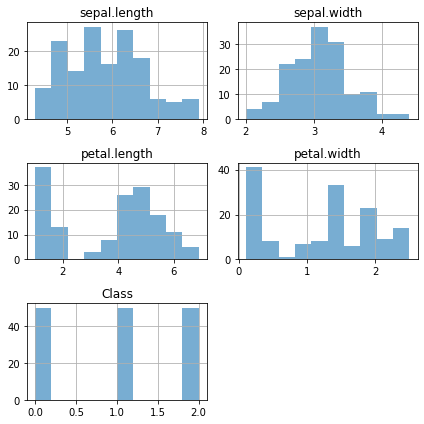

In [26]:
#直方圖 histograms
df_train.hist(alpha = 0.6,figsize=(6,6)) #alpha為透明程度[0,1] #figsize長寬大小
plt.tight_layout()  #長寬高自動分配 不會擠在一起
plt.show()

### 核密度估計 Kernel Density Estimation(KDE)

array([[<AxesSubplot:xlabel='sepal.length', ylabel='sepal.length'>,
        <AxesSubplot:xlabel='sepal.width', ylabel='sepal.length'>,
        <AxesSubplot:xlabel='petal.length', ylabel='sepal.length'>,
        <AxesSubplot:xlabel='petal.width', ylabel='sepal.length'>,
        <AxesSubplot:xlabel='Class', ylabel='sepal.length'>],
       [<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>,
        <AxesSubplot:xlabel='sepal.width', ylabel='sepal.width'>,
        <AxesSubplot:xlabel='petal.length', ylabel='sepal.width'>,
        <AxesSubplot:xlabel='petal.width', ylabel='sepal.width'>,
        <AxesSubplot:xlabel='Class', ylabel='sepal.width'>],
       [<AxesSubplot:xlabel='sepal.length', ylabel='petal.length'>,
        <AxesSubplot:xlabel='sepal.width', ylabel='petal.length'>,
        <AxesSubplot:xlabel='petal.length', ylabel='petal.length'>,
        <AxesSubplot:xlabel='petal.width', ylabel='petal.length'>,
        <AxesSubplot:xlabel='Class', ylabel='petal.length'>],
       [<

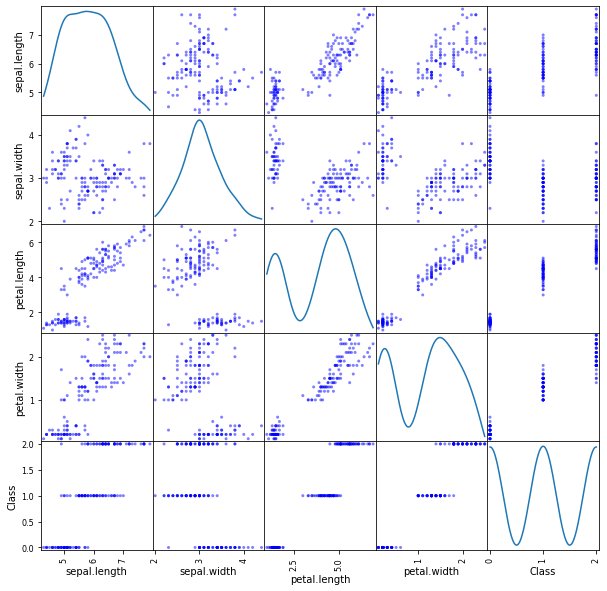

In [27]:
from pandas.plotting import scatter_matrix  #Method one
scatter_matrix(df_train,figsize=(10,10),color="b",diagonal="kde")

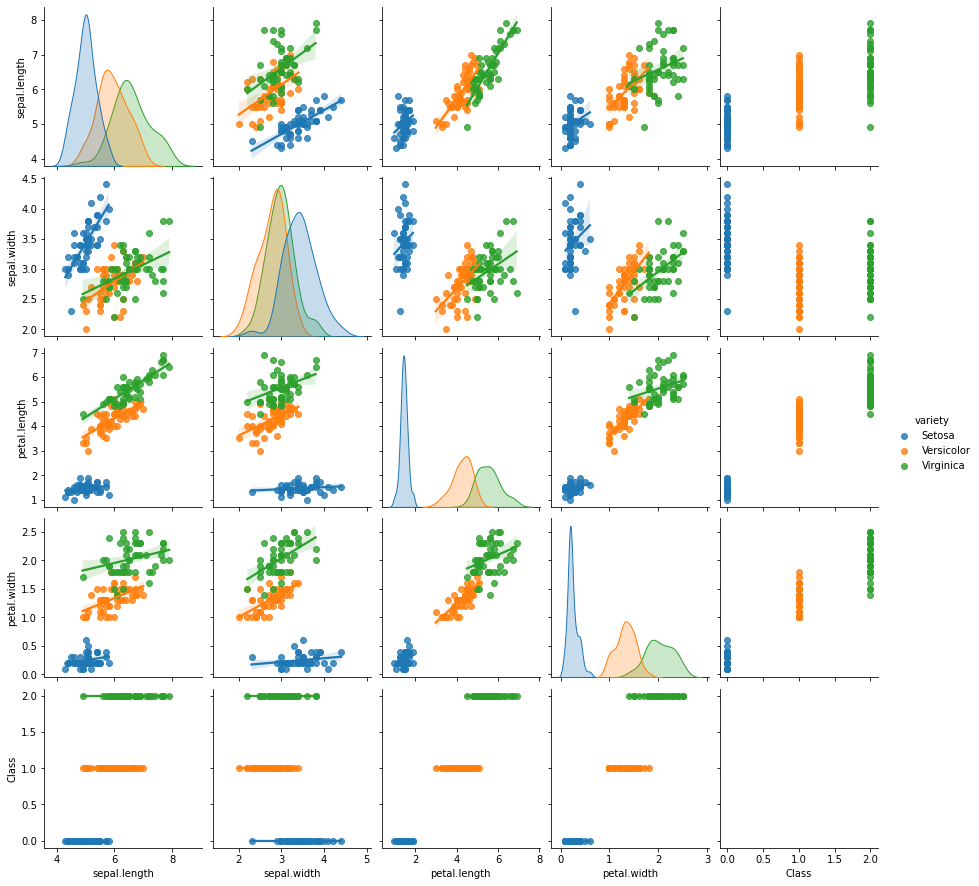

In [32]:
sns.pairplot(df_train, hue = "variety", kind="reg")  #method two



In [ ]:
sns.pairplot?

### 關聯分析(correlation map)

<AxesSubplot:>

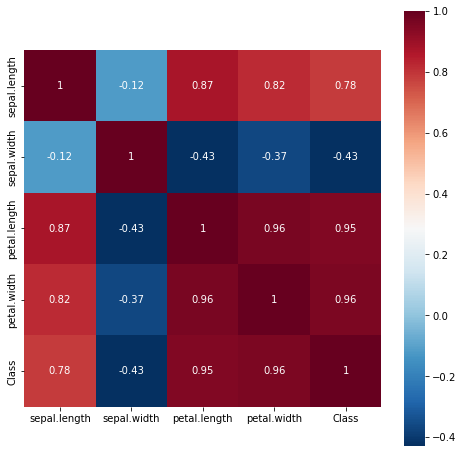

In [34]:
#correlation calculate    #corr為pandas中的一套建
corr = df_train[["sepal.length",'sepal.width','petal.length','petal.width','Class']].corr() #這函式可以快速地去計算，每個特徵值彼此的關聯程度
plt.figure(figsize=(8,8))
sns.heatmap(corr,square=True,annot=True,cmap="RdBu_r") #center=0,cmap="YlGnBu"

#數字越大 關聯程度越高

### 散佈圖

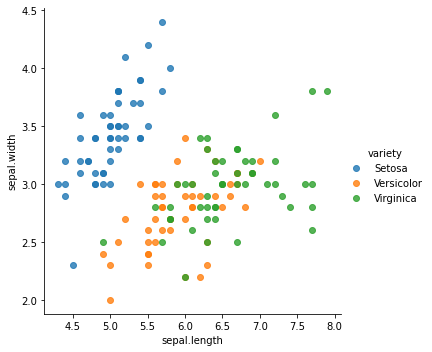

In [36]:
sns.lmplot("sepal.length",'sepal.width',hue='variety',data=df_train, fit_reg=False)
#該特徵的關聯程度越高，群聚的效果會更加顯著

d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


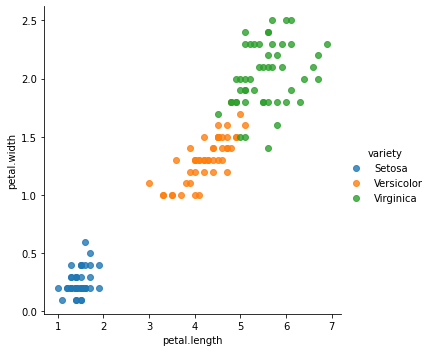

In [38]:
sns.lmplot("petal.length",'petal.width',hue = "variety",data = df_train,fit_reg=False)

### 箱型圖
透過箱型圖可以分析每個特徵的分布狀況以及是否有離群值

Text(0.5, 1.0, 'Class')

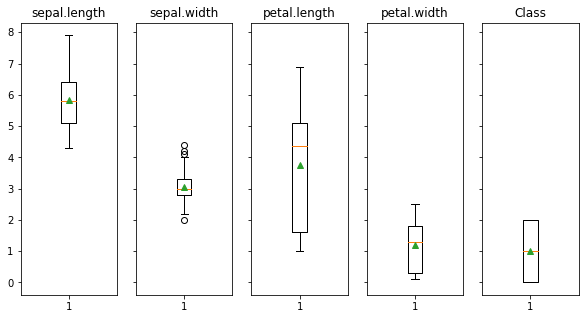

In [42]:
fig, axes =plt.subplots(nrows=1,ncols=5,figsize=(10,5),sharey=True)
axes[0].boxplot(df_train['sepal.length'],showmeans = True)
axes[0].set_title('sepal.length')

axes[1].boxplot(df_train['sepal.width'],showmeans = True)
axes[1].set_title('sepal.width')

axes[2].boxplot(df_train['petal.length'],showmeans = True)
axes[2].set_title('petal.length')

axes[3].boxplot(df_train['petal.width'],showmeans = True)
axes[3].set_title('petal.width')

axes[4].boxplot(df_train['Class'],showmeans = True)
axes[4].set_title('Class')

### 分布狀態

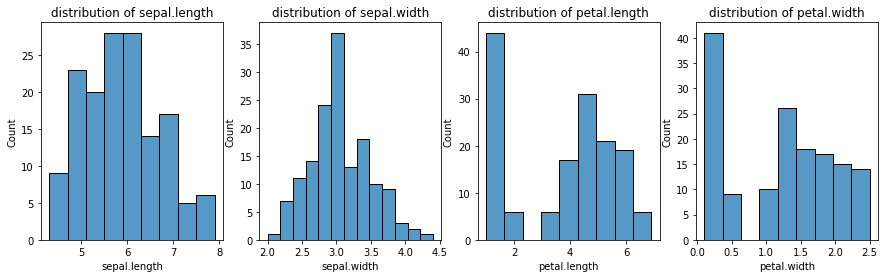

In [58]:
fig , axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)


sns.histplot(x = df_train['sepal.length'].values, ax = axes[0])
sns.histplot(x = df_train['sepal.width'].values, ax = axes[1])
sns.histplot(x = df_train['petal.length'].values, ax = axes[2])
sns.histplot(x = df_train['petal.width'].values, ax = axes[3])


axes[0].set(xlabel = 'sepal.length',title='distribution of sepal.length')
axes[1].set(xlabel = 'sepal.width',title='distribution of sepal.width')
axes[2].set(xlabel = 'petal.length',title='distribution of petal.length')
axes[3].set(xlabel = 'petal.width',title='distribution of petal.width')

plt.show()